In [1]:
import numpy as np
# Implementacja rekurencyjnej sieci neuronowej do sumowania dwóch liczb 24-bitowych
def bin_add(a, b):
    """Funkcja dodająca dwie liczby binarne"""
    a = np.array([int(x) for x in a], dtype=int)
    b = np.array([int(x) for x in b], dtype=int)

    carry = 0
    result = []
    
    # Dodawanie bit po bicie
    for i in range(len(a)-1, -1, -1):
        total = a[i] + b[i] + carry
        result.append(total % 2)
        carry = total // 2
    
    if carry:
        result.append(carry)
    
    return ''.join(map(str, result[::-1]))

# Przykład dodawania dwóch liczb binarnych 24-bitowych
a = '110110110101101101110101'
b = '101101101111010101110010'

print(bin_add(a, b)) 

1100100100101000011100111


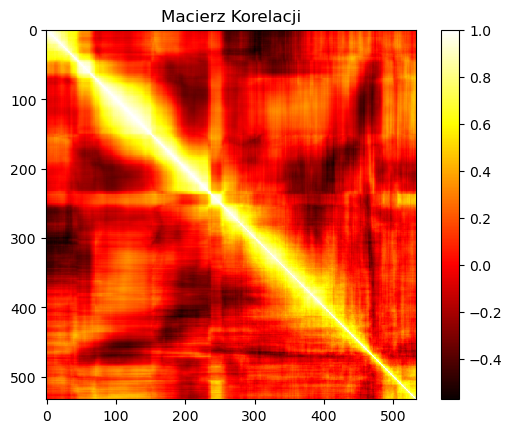

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from skimage import io
# Obliczanie korelacji obrazu z użyciem SVD
# Załaduj obraz
image_url = "6.webp"  # obraz z wariantu 6
image = io.imread(image_url, as_gray=True)

# Obliczanie macierzy korelacji
corr_matrix = np.corrcoef(image)

# Rozkład SVD
svd = TruncatedSVD(n_components=2)  # Przykład rozkładu na 2 komponenty
svd.fit(corr_matrix)

# Zbiór macierzy U, Σ, V
U = svd.components_.T  # Wektory własne wierszy
V = svd.components_  # Wektory własne kolumn

# Wizualizacja macierzy korelacji
plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Macierz Korelacji")
plt.show()

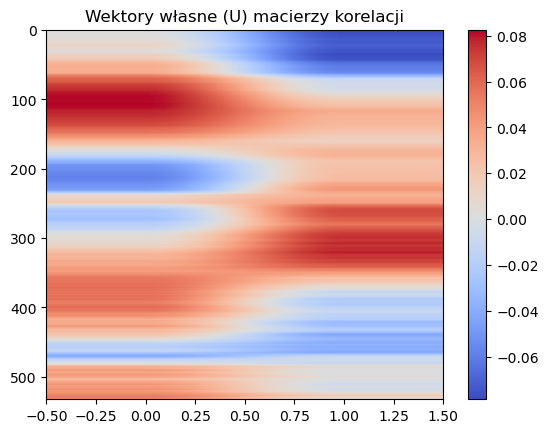

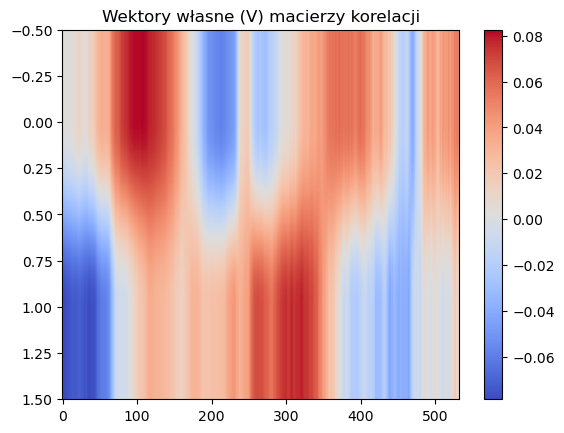

In [5]:
#Wizualizacja wyników SVD i korelacji
# Wizualizacja pierwszej składowej SVD
plt.imshow(U, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title("Wektory własne (U) macierzy korelacji")
plt.show()

# Wizualizacja drugiej składowej SVD
plt.imshow(V, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title("Wektory własne (V) macierzy korelacji")
plt.show()